# Analysis
Observed trend 1: <br>
>When comparing temperature to the latitude, you can see a clear peak at the equator (0 degrees). This would indicate that the hottest temperatures happen around the equator, which would follow the logic that those areas tend to get the most direct sunlight. The farther north or south you move from the equator, the lower you see the temperatures go, however, there is a noticable difference bettwen the rate at which the northern hemisphere cools vs the southern. Using more city data would be needed to fully see this trend and to possibly make a model to predict a temperature at a given latitude.<br>
<br>

Observed trend 2:<br>
>Interestingly, we see the greatest difference in humidity (%) at the equator. This could be due to the range of vegetaion in the surrounding areas where each reading was taken. For example, a desert environment in Africa might have a very low humidity due to the low presence of water. While on the other hand, the Rain Forrests of the Amazon offer lush vegetation and ample water to be dispersed into the air, causing high humidity readings. You rarely find these types of extremes as you approach the poles of the planet, mostly due to the effect temperature has on water - which is what humidity is based on.<br>
<br>

Observed trend 3:<br>
>Cloudiness doesn't tell us much on a daily basis, other than what cities MIGHT have had some form of percipitation fall. Of the data from the day, we can see that it was fairly cloudy in the northen hemisphere in certain areas, while other areas remained completely clear. Without investigating further and correlating each data point on the graph with its geographical location, it's hard to really say which area might have had the most cloud-cover and which might've had the least. <br>
<br>

In [1]:
# Importing Dependencies
import matplotlib.pyplot as plt
import requests
import openweathermapy.core as ow
import pandas as pd
import os
import json
import citipy
import random
import numpy as np
import seaborn as sb
import time

In [2]:
# Loading API Keys and Setting up Save Path
api_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath('__file__')))))
file_name = os.path.join(api_dir, "api_keys.json")
data = json.load(open(file_name))

wkey = data['open_weather_map_api_key']

In [3]:
# Take in cities and coords database
cities_file = os.path.join("Resources", "cities1000.csv")
cities_data_df = pd.read_csv(cities_file)

# Create random sample of cities to have coords to use
sample_cities_df = cities_data_df.sample(n=500, random_state=20)
sample_cities_df.head()

,City,Latitude,Longitude,Country Code
79101,Grou,53.09456,5.83745,NL
118623,Augusta,42.97479,-75.50129,US
42604,Wilmcote,52.22081,-1.76528,GB
112715,Belpre,39.27396,-81.5729,US
26285,Abū al Maţāmīr,30.91018,30.17438,EG


In [6]:
# Setting up sentiments
url = 0
counter = 0
weather_dict = {"city" : [],
                "country_code" : [],
                "lat" :  [],
                "lng" : [],
                "temp" : [],
                "temp_min" : [],
                "temp_max" : [],
                "humidity" : [],
                "cloudiness" : [],
                "wind_speed" :  [],
                "url": []
                }

# Starting loop to gather urls
for index, row in sample_cities_df.iterrows():
    
    # Creating URL for each lat and long set   
    url = "https://api.openweathermap.org/data/2.5/weather?lat=" + str(row['Latitude']) + "&lon=" + \
            str(row['Longitude']) + "&appid=" + wkey
    
    # Creating Sleep
    time.sleep(1)
    
    # Calling API
    weather_json = requests.get(url).json()
    
    # Trying to grab API data
    try:
        weather_dict['city'].append(weather_json['name'])
    except:
        weather_dict['city'].append("None")
    try:
        weather_dict['country_code'].append(weather_json['sys']['country'])
    except:
        weather_dict['country_code'].append("None")
        
    weather_dict['lat'].append(weather_json['coord']['lat'])
    weather_dict['lng'].append(weather_json['coord']['lon'])
    weather_dict['temp'].append(weather_json['main']['temp'] * (9/5) - 459.67)
    weather_dict['temp_min'].append(weather_json['main']['temp_min'] * (9/5) - 459.67)
    weather_dict['temp_max'].append(weather_json['main']['temp_max'] * (9/5) - 459.67)
    weather_dict['humidity'].append(weather_json['main']['humidity'])
    weather_dict['cloudiness'].append(weather_json['clouds']['all'])
    weather_dict['wind_speed'].append(weather_json['wind']['speed'])
    weather_dict['url'].append(url)

    # Incrementing counter for status
    counter += 1
    
    # Creating printout of status
    print(f"Processing City Number: {counter} out of {len(sample_cities_df.index)}")
    print(f"Index Number: {index}")
    try:
        print(f"City and Country Code: {weather_json['name']}, {weather_json['sys']['country']}")
    except:
        print(f"City and Country Code: {weather_json['name']}")
    print(f"API URL: {url}")
    
# Creates a DF to use of all the data
weather_sample_df = pd.DataFrame(weather_dict)

# Saves previous said DF to a csv
weather_sample_df.to_csv('Resources/weather_sample_df.csv', encoding='utf-8')

Processing City Number: 1 out of 500
Index Number: 79101
City and Country Code: Grou, NL
API URL: https://api.openweathermap.org/data/2.5/weather?lat=53.09456&lon=5.83745&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 2 out of 500
Index Number: 118623
City and Country Code: New York, US
API URL: https://api.openweathermap.org/data/2.5/weather?lat=42.97479&lon=-75.50129&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 3 out of 500
Index Number: 42604
City and Country Code: Stratford-upon-Avon, GB
API URL: https://api.openweathermap.org/data/2.5/weather?lat=52.22081&lon=-1.76528&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 4 out of 500
Index Number: 112715
City and Country Code: Belpre, US
API URL: https://api.openweathermap.org/data/2.5/weather?lat=39.27396&lon=-81.5729&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 5 out of 500
Index Number: 26285
City and Country Code: Abu al Matamir, EG
API URL: https://api.openweatherma

Processing City Number: 39 out of 500
Index Number: 105290
City and Country Code: Esme, TR
API URL: https://api.openweathermap.org/data/2.5/weather?lat=37.15569&lon=40.64142&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 40 out of 500
Index Number: 13758
City and Country Code: Lichuan, CN
API URL: https://api.openweathermap.org/data/2.5/weather?lat=30.3&lon=108.85&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 41 out of 500
Index Number: 126658
City and Country Code: Al Mahfid, YE
API URL: https://api.openweathermap.org/data/2.5/weather?lat=14.05847&lon=46.91329&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 42 out of 500
Index Number: 53896
City and Country Code: Rangia, IN
API URL: https://api.openweathermap.org/data/2.5/weather?lat=26.44931&lon=91.61356&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 43 out of 500
Index Number: 36326
City and Country Code: Reuilly, FR
API URL: https://api.openweathermap.org/data/2.5/weat

Processing City Number: 77 out of 500
Index Number: 77821
City and Country Code: Kura, NG
API URL: https://api.openweathermap.org/data/2.5/weather?lat=11.69924&lon=8.54127&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 78 out of 500
Index Number: 79434
City and Country Code: Gemeente Cuijk, NL
API URL: https://api.openweathermap.org/data/2.5/weather?lat=51.72583&lon=5.82778&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 79 out of 500
Index Number: 47859
City and Country Code: Sindos, GR
API URL: https://api.openweathermap.org/data/2.5/weather?lat=40.67045&lon=22.80545&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 80 out of 500
Index Number: 74647
City and Country Code: Colonia Lazaro Cardenas, MX
API URL: https://api.openweathermap.org/data/2.5/weather?lat=28.38333&lon=-105.61667&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 81 out of 500
Index Number: 100546
City and Country Code: Sosnovo-Ozerskoye, RU
API URL: https://

Processing City Number: 115 out of 500
Index Number: 79582
City and Country Code: Nordreisa, NO
API URL: https://api.openweathermap.org/data/2.5/weather?lat=69.76783&lon=21.02466&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 116 out of 500
Index Number: 115006
City and Country Code: Rural Retreat, US
API URL: https://api.openweathermap.org/data/2.5/weather?lat=36.89373&lon=-81.27593&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 117 out of 500
Index Number: 113466
City and Country Code: Manning, US
API URL: https://api.openweathermap.org/data/2.5/weather?lat=33.69516&lon=-80.21091&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 118 out of 500
Index Number: 24033
City and Country Code: Bodenmais, DE
API URL: https://api.openweathermap.org/data/2.5/weather?lat=49.06667&lon=13.1&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 119 out of 500
Index Number: 60642
City and Country Code: Pecorara, IT
API URL: https://api.openweathe

Processing City Number: 153 out of 500
Index Number: 28960
City and Country Code: Tricio, ES
API URL: https://api.openweathermap.org/data/2.5/weather?lat=42.40223&lon=-2.71912&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 154 out of 500
Index Number: 12698
City and Country Code: Ningxiang, CN
API URL: https://api.openweathermap.org/data/2.5/weather?lat=37.34&lon=111.20523&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 155 out of 500
Index Number: 92632
City and Country Code: Rovinari, RO
API URL: https://api.openweathermap.org/data/2.5/weather?lat=44.91667&lon=23.18333&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 156 out of 500
Index Number: 28600
City and Country Code: Villalba de Perejil, ES
API URL: https://api.openweathermap.org/data/2.5/weather?lat=41.32742&lon=-1.54833&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 157 out of 500
Index Number: 33132
City and Country Code: Mendexa, ES
API URL: https://api.openweath

Processing City Number: 191 out of 500
Index Number: 87222
City and Country Code: Bahawalpur, PK
API URL: https://api.openweathermap.org/data/2.5/weather?lat=29.39779&lon=71.6752&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 192 out of 500
Index Number: 536
City and Country Code: Milot, AL
API URL: https://api.openweathermap.org/data/2.5/weather?lat=41.70778&lon=19.68917&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 193 out of 500
Index Number: 61658
City and Country Code: Loria, IT
API URL: https://api.openweathermap.org/data/2.5/weather?lat=45.73&lon=11.8654&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 194 out of 500
Index Number: 110468
City and Country Code: Basehor, US
API URL: https://api.openweathermap.org/data/2.5/weather?lat=39.14167&lon=-94.93858&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 195 out of 500
Index Number: 110477
City and Country Code: Caldwell, US
API URL: https://api.openweathermap.org/data/2

Processing City Number: 229 out of 500
Index Number: 20930
City and Country Code: Meissenheim, DE
API URL: https://api.openweathermap.org/data/2.5/weather?lat=48.41035&lon=7.77266&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 230 out of 500
Index Number: 76393
City and Country Code: Plateros, MX
API URL: https://api.openweathermap.org/data/2.5/weather?lat=23.32278&lon=-103.01444&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 231 out of 500
Index Number: 91182
City and Country Code: Refojos de Basto, PT
API URL: https://api.openweathermap.org/data/2.5/weather?lat=41.51431&lon=-7.98942&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 232 out of 500
Index Number: 60872
City and Country Code: Oliena, IT
API URL: https://api.openweathermap.org/data/2.5/weather?lat=40.27617&lon=9.40193&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 233 out of 500
Index Number: 22458
City and Country Code: Hahnheim, DE
API URL: https://api.openwea

Processing City Number: 267 out of 500
Index Number: 18321
City and Country Code: Weener, DE
API URL: https://api.openweathermap.org/data/2.5/weather?lat=53.16332&lon=7.35052&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 268 out of 500
Index Number: 49740
City and Country Code: Vidovci, HR
API URL: https://api.openweathermap.org/data/2.5/weather?lat=45.3325&lon=17.71472&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 269 out of 500
Index Number: 98178
City and Country Code: Manturovo, RU
API URL: https://api.openweathermap.org/data/2.5/weather?lat=51.4547&lon=37.1282&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 270 out of 500
Index Number: 93777
City and Country Code: Lapusnicu Mare, RO
API URL: https://api.openweathermap.org/data/2.5/weather?lat=44.91306&lon=21.94417&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 271 out of 500
Index Number: 78472
City and Country Code: Gemeente Someren, NL
API URL: https://api.openweat

Processing City Number: 305 out of 500
Index Number: 18442
City and Country Code: Waischenfeld, DE
API URL: https://api.openweathermap.org/data/2.5/weather?lat=49.84645&lon=11.3481&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 306 out of 500
Index Number: 67653
City and Country Code: Nirasaki, JP
API URL: https://api.openweathermap.org/data/2.5/weather?lat=35.7&lon=138.45&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 307 out of 500
Index Number: 90660
City and Country Code: Tunes, PT
API URL: https://api.openweathermap.org/data/2.5/weather?lat=37.16592&lon=-8.25919&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 308 out of 500
Index Number: 35153
City and Country Code: Saint-Valery-en-Caux, FR
API URL: https://api.openweathermap.org/data/2.5/weather?lat=49.86667&lon=0.73333&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 309 out of 500
Index Number: 31229
City and Country Code: Gordoncillo, ES
API URL: https://api.openweat

Processing City Number: 343 out of 500
Index Number: 20353
City and Country Code: Obergurig, DE
API URL: https://api.openweathermap.org/data/2.5/weather?lat=51.13294&lon=14.40488&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 344 out of 500
Index Number: 82943
City and Country Code: Seres, PH
API URL: https://api.openweathermap.org/data/2.5/weather?lat=8.4803&lon=123.2629&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 345 out of 500
Index Number: 83109
City and Country Code: Santa Clara, PH
API URL: https://api.openweathermap.org/data/2.5/weather?lat=6.6782&lon=122.06&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 346 out of 500
Index Number: 118993
City and Country Code: Hurley, US
API URL: https://api.openweathermap.org/data/2.5/weather?lat=41.92454&lon=-74.06125&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 347 out of 500
Index Number: 105217
City and Country Code: Doganyol, TR
API URL: https://api.openweathermap.org/d

Processing City Number: 381 out of 500
Index Number: 90356
City and Country Code: Silat az Zahr, PS
API URL: https://api.openweathermap.org/data/2.5/weather?lat=32.31934&lon=35.18418&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 382 out of 500
Index Number: 51292
City and Country Code: Pangkajene, ID
API URL: https://api.openweathermap.org/data/2.5/weather?lat=-4.8372&lon=119.5472&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 383 out of 500
Index Number: 67786
City and Country Code: Kashiwa, JP
API URL: https://api.openweathermap.org/data/2.5/weather?lat=35.86224&lon=139.97732&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 384 out of 500
Index Number: 46181
City and Country Code: Ash, GB
API URL: https://api.openweathermap.org/data/2.5/weather?lat=52.95&lon=-2.65&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 385 out of 500
Index Number: 97138
City and Country Code: Staraya Kupavna, RU
API URL: https://api.openweathermap

Processing City Number: 419 out of 500
Index Number: 98843
City and Country Code: Issa, RU
API URL: https://api.openweathermap.org/data/2.5/weather?lat=53.87049&lon=44.85781&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 420 out of 500
Index Number: 116587
City and Country Code: Harwich, US
API URL: https://api.openweathermap.org/data/2.5/weather?lat=41.68622&lon=-70.07585&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 421 out of 500
Index Number: 20649
City and Country Code: Eppenrod, DE
API URL: https://api.openweathermap.org/data/2.5/weather?lat=50.41667&lon=7.93333&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 422 out of 500
Index Number: 62413
City and Country Code: Eraclea, IT
API URL: https://api.openweathermap.org/data/2.5/weather?lat=45.57766&lon=12.6732&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 423 out of 500
Index Number: 38903
City and Country Code: La Fouillouse, FR
API URL: https://api.openweathermap.or

Processing City Number: 457 out of 500
Index Number: 57452
City and Country Code: Segariu, IT
API URL: https://api.openweathermap.org/data/2.5/weather?lat=39.56403&lon=8.98163&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 458 out of 500
Index Number: 33055
City and Country Code: Port dAlcudia, ES
API URL: https://api.openweathermap.org/data/2.5/weather?lat=39.84182&lon=3.13291&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 459 out of 500
Index Number: 12221
City and Country Code: Villa Alemana, CL
API URL: https://api.openweathermap.org/data/2.5/weather?lat=-33.04222&lon=-71.37333&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 460 out of 500
Index Number: 98547
City and Country Code: Korenevo, RU
API URL: https://api.openweathermap.org/data/2.5/weather?lat=55.67194&lon=38.00778&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 461 out of 500
Index Number: 109249
City and Country Code: Hillsboro Beach, US
API URL: https://api

Processing City Number: 495 out of 500
Index Number: 31010
City and Country Code: Jatiel, ES
API URL: https://api.openweathermap.org/data/2.5/weather?lat=41.22008&lon=-0.38183&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 496 out of 500
Index Number: 48109
City and Country Code: Nea Ionia, GR
API URL: https://api.openweathermap.org/data/2.5/weather?lat=40.68744&lon=22.85799&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 497 out of 500
Index Number: 27851
City and Country Code: Calp, ES
API URL: https://api.openweathermap.org/data/2.5/weather?lat=38.6447&lon=0.0445&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 498 out of 500
Index Number: 87900
City and Country Code: Miaczyn, PL
API URL: https://api.openweathermap.org/data/2.5/weather?lat=50.73825&lon=23.5013&appid=de6eeb5e838ae1aee6c66e7e9de1f551
Processing City Number: 499 out of 500
Index Number: 55502
City and Country Code: Gautampura, IN
API URL: https://api.openweathermap.org/data/

# Temperature (F) vs. Latitude

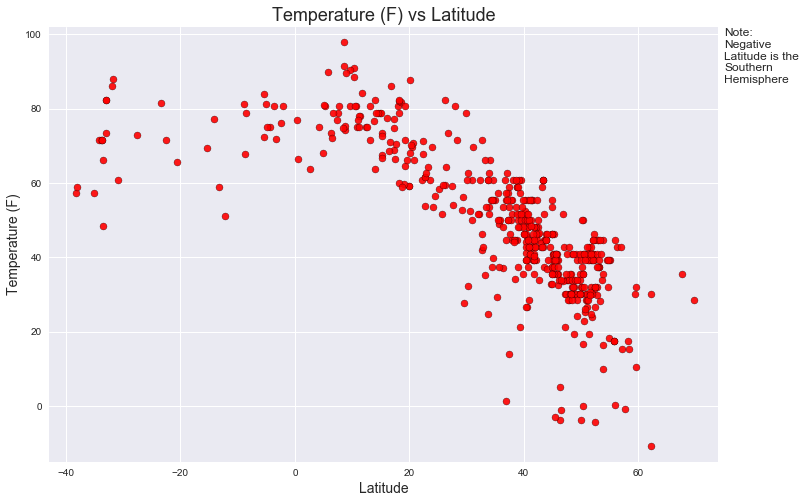

In [136]:
# Setting Plot Style
plt.style.use('seaborn')
plt.figure(figsize=(12,8))

# Creating the scatter for Temp vs Lat
plt.scatter(weather_sample_df['lat'], weather_sample_df['temp_max'], marker="o", c='red', edgecolors="black", \
            alpha=.9)

# Formatting the plot
plt.ylim(int(weather_sample_df['temp_max'].min()-5), int(weather_sample_df['temp_max'].max()+5))
plt.xlim(int(weather_sample_df['lat'].min()-5), int(weather_sample_df['lat'].max()+5))
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Temperature (F)", fontsize=14)
plt.title("Temperature (F) vs Latitude", fontsize=18)
plt.text(int(weather_sample_df['lat'].max()+6), int(weather_sample_df['temp_max'].max()-10), 'Note:\nNegative\nLatitude is the\nSouthern\nHemisphere', fontsize=12)

# Saving the scatter before printing
plt.savefig('Resources/Temp_vs_Latitude.png')

# Printng out the plot
plt.show()

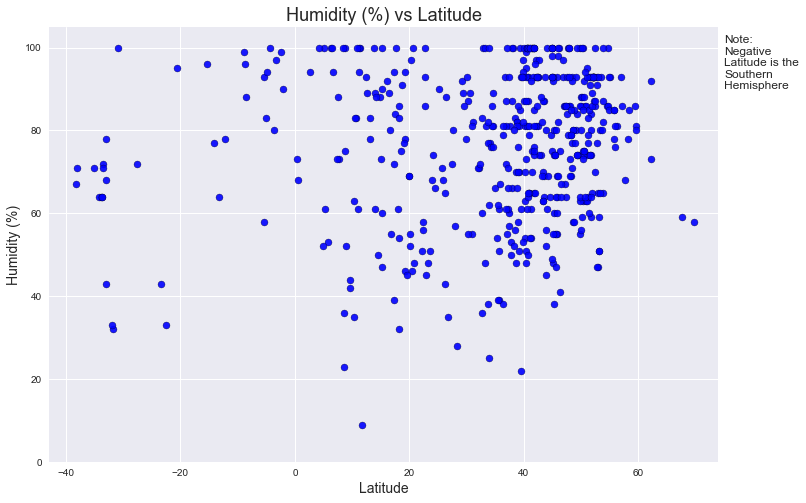

In [137]:
# Setting Plot Style
plt.style.use('seaborn')
plt.figure(figsize=(12,8))

# Creating the scatter for Temp vs Lat
plt.scatter(weather_sample_df['lat'], weather_sample_df['humidity'], marker="o", c='b', edgecolors="black", \
            alpha=.9)

# Formatting the plot
plt.ylim(0, 105)
plt.xlim(int(weather_sample_df['lat'].min()-5), int(weather_sample_df['lat'].max()+5))
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=14)
plt.title("Humidity (%) vs Latitude", fontsize=18)
plt.text(int(weather_sample_df['lat'].max()+6), int(weather_sample_df['humidity'].max()-10), 'Note:\nNegative\nLatitude is the\nSouthern\nHemisphere', fontsize=12)

# Saving the scatter before printing
plt.savefig('Resources/Humidity_vs_Latitude.png')

# Printng out the plot
plt.show()

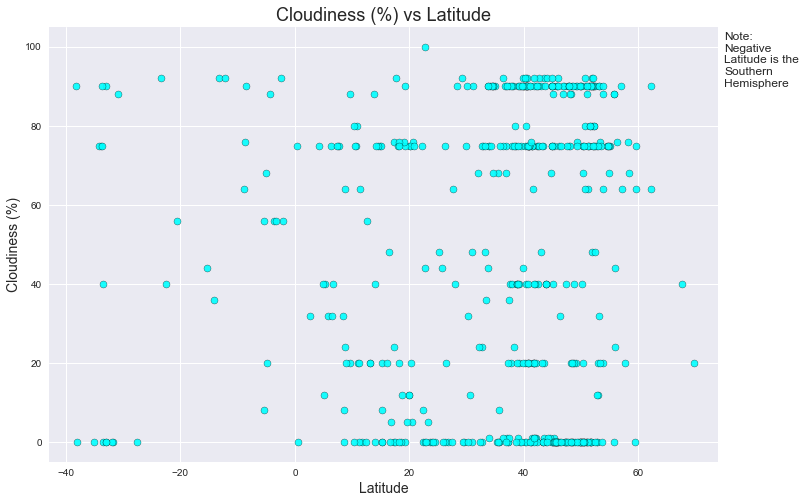

In [138]:
# Setting Plot Style
plt.style.use('seaborn')
plt.figure(figsize=(12,8))

# Creating the scatter for Temp vs Lat
plt.scatter(weather_sample_df['lat'], weather_sample_df['cloudiness'], marker="o", c='cyan', edgecolors="black", \
            alpha=.9)

# Formatting the plot
plt.ylim(-5, 105)
plt.xlim(int(weather_sample_df['lat'].min()-5), int(weather_sample_df['lat'].max()+5))
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.title("Cloudiness (%) vs Latitude", fontsize=18)
plt.text(int(weather_sample_df['lat'].max()+6), int(weather_sample_df['cloudiness'].max()-10), 'Note:\nNegative\nLatitude is the\nSouthern\nHemisphere', fontsize=12)

# Saving the scatter before printing
plt.savefig('Resources/Cloudiness_vs_Latitude.png')

# Printng out the plot
plt.show()

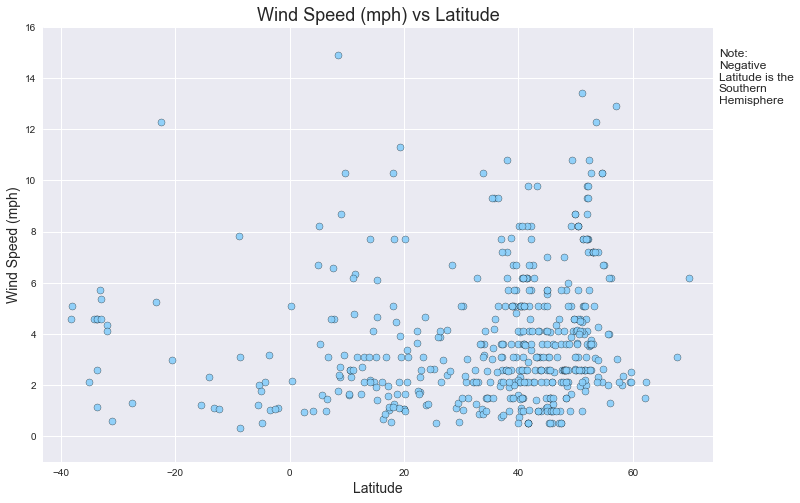

In [139]:
# Setting Plot Style
plt.style.use('seaborn')
plt.figure(figsize=(12,8))

# Creating the scatter for Wind Speed vs Lat
plt.scatter(weather_sample_df['lat'], weather_sample_df['wind_speed'], marker="o", c='lightskyblue', edgecolors="black", \
            alpha=.9)

# Formatting the plot
plt.ylim(int(weather_sample_df['wind_speed'].min()-2), int(weather_sample_df['wind_speed'].max()+2))
plt.xlim(int(weather_sample_df['lat'].min()-5), int(weather_sample_df['lat'].max()+5))
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed (mph)", fontsize=14)
plt.title("Wind Speed (mph) vs Latitude", fontsize=18)
plt.text(int(weather_sample_df['lat'].max()+6), int(weather_sample_df['wind_speed'].max()-1), 'Note:\nNegative\nLatitude is the\nSouthern\nHemisphere', fontsize=12)

# Saving the scatter before printing
plt.savefig('Resources/Wind_Speed_vs_Latitude.png')

# Printng out the plot
plt.show()